In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
# params
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [4]:
# Test 
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0391, -0.0074, -0.0690,  0.0549, -0.0306, -0.1024,  0.1469,  0.0074,
          0.0743,  0.0317]], grad_fn=<AddmmBackward0>)


In [7]:
# Gradient
net.zero_grad()
out.backward(torch.randn(1, 10))

In [8]:
# Loss function 
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4524, grad_fn=<MseLossBackward0>)


In [9]:
# visualize
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# Deep Learning Image Classification 

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

In [11]:
# Get dataset and dataloader 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


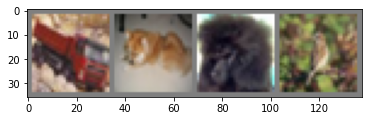

truck dog   dog   bird 


In [12]:
# Visualize images 
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [86]:
# Define CNN 
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 64, 5)
        self.fc1 = nn.Linear(64 * 1 * 1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)

In [87]:
# Loss function and optimizer 
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [83]:
# Testing shapes 
test_model = Net() 
batch_img, batch_feature = next(iter(trainloader))
pred = test_model(batch_img[:1])

torch.Size([1, 3, 32, 32])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 5, 5])
torch.Size([1, 64, 1, 1])
torch.Size([1, 64])


In [88]:
# training
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.975
[1,  4000] loss: 1.675
[1,  6000] loss: 1.555
[1,  8000] loss: 1.492
[1, 10000] loss: 1.423
[1, 12000] loss: 1.379
[2,  2000] loss: 1.322
[2,  4000] loss: 1.286
[2,  6000] loss: 1.288
[2,  8000] loss: 1.254
[2, 10000] loss: 1.258
[2, 12000] loss: 1.234
[3,  2000] loss: 1.153
[3,  4000] loss: 1.166
[3,  6000] loss: 1.142
[3,  8000] loss: 1.113
[3, 10000] loss: 1.124
[3, 12000] loss: 1.112
[4,  2000] loss: 1.041
[4,  4000] loss: 1.055
[4,  6000] loss: 1.047
[4,  8000] loss: 1.043
[4, 10000] loss: 1.032
[4, 12000] loss: 1.040
[5,  2000] loss: 0.959
[5,  4000] loss: 0.944
[5,  6000] loss: 0.992
[5,  8000] loss: 0.970
[5, 10000] loss: 0.971
[5, 12000] loss: 0.985
[6,  2000] loss: 0.886
[6,  4000] loss: 0.930
[6,  6000] loss: 0.923
[6,  8000] loss: 0.919
[6, 10000] loss: 0.929
[6, 12000] loss: 0.921
[7,  2000] loss: 0.853
[7,  4000] loss: 0.864
[7,  6000] loss: 0.872
[7,  8000] loss: 0.891
[7, 10000] loss: 0.901
[7, 12000] loss: 0.890
[8,  2000] loss: 0.847
[8,  4000] 

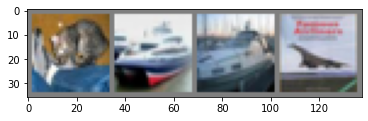

GroundTruth:  cat   ship  ship  plane


In [89]:
# Evaluation 
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [90]:
# Inference 
outputs = net(images)
outputs

tensor([[ -3.7847,  -6.5756,  -3.6473,  -0.5742,  -2.7465,  -2.2629,  -3.4084,
          -4.4373,  -4.1186,  -4.0529],
        [ -6.8913,  -7.6600, -15.1785, -17.4311, -27.8176, -16.8711, -17.0647,
         -16.8433,  -2.3828,  -8.2606],
        [ -0.7801,  -3.4905,  -5.6930,  -7.8075, -10.5838,  -8.4251,  -8.1241,
          -7.7415,   0.5760,  -3.0143],
        [  1.0865,  -2.7872,  -1.4922,  -2.6468,  -2.5667,  -4.0612,  -3.8635,
          -3.6113,   0.5606,  -1.4705]], grad_fn=<AddmmBackward0>)

In [91]:
# Find predicted class 
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [92]:
# Evaluation
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 68 %


In [93]:
## Determine percentages across the 10 classes 
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 79.7 %
Accuracy for class: car   is 76.4 %
Accuracy for class: bird  is 52.7 %
Accuracy for class: cat   is 47.5 %
Accuracy for class: deer  is 67.5 %
Accuracy for class: dog   is 47.9 %
Accuracy for class: frog  is 77.3 %
Accuracy for class: horse is 68.5 %
Accuracy for class: ship  is 82.4 %
Accuracy for class: truck is 82.5 %


In [35]:
# Train on GPU if available 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
